 **Information Retrieval System Development**

**Engr.Ahmad Ali**

**Step 1:-Loading Data Set from Google Drive**

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/CNN_Articels_clean.csv')

In [2]:
df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...


**Step 2: Checking for null values and duplicates.**

In [3]:
df.isnull().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(4076, 11)

**Visualizing some data Features to get insight:-**

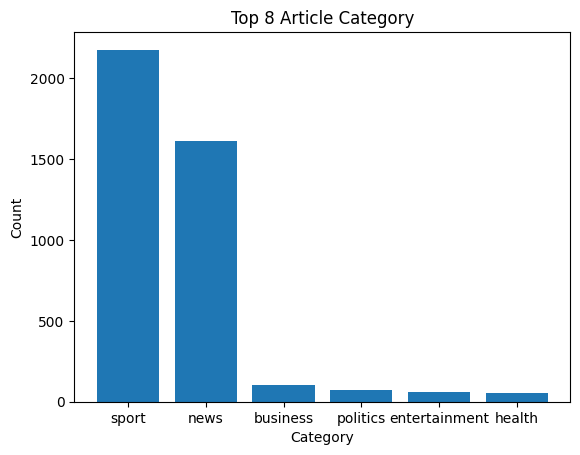

In [24]:
import matplotlib.pyplot as plt
a=df['Category'].value_counts()
plt.bar(a.index,a.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 8 Article Category')
plt.xticks(rotation=0)
plt.show()

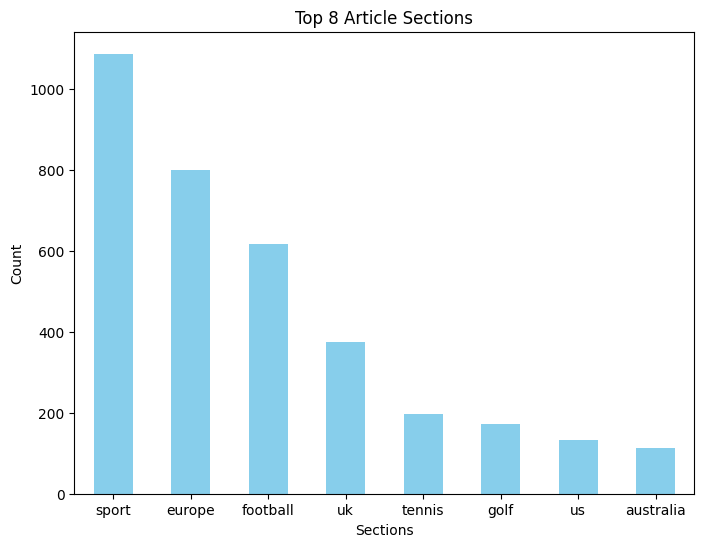

In [7]:
import matplotlib.pyplot as plt
a=df['Section'].value_counts()
top_5_counts = a[:8]
plt.figure(figsize=(8, 6))
top_5_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sections')
plt.ylabel('Count')
plt.title('Top 8 Article Sections')
plt.xticks(rotation=0)
plt.show()

**importing all Liberaries:-**

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

**Applying Perprocessing to data columns:-**

In [10]:
def data_preprocessing(text):
  # Removing punctuatoins:

  punctuation_pattern = r'[!@#$%^&*()_+{}\[\]:;"\'<>,.?/\|\\-]'
  text=re.sub(punctuation_pattern,'', text)
  # Tokenize and lower case conversion:

  words=word_tokenize(text.lower())

  # Remove numbers using regular expression
  words = [word for word in words if not re.match(r'\d+', word)]
  # Applying stopwords:

  stop_words = set(stopwords.words('english'))
  words=[word for word in words if word not in stop_words]
  # Applying Stemming:

  stemmer = PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  processed_text = ' '.join(words)

  return processed_text
df['Description']=df['Description'].apply(data_preprocessing)
df['Headline']=df['Headline'].apply(data_preprocessing)
df['Keywords']=df['Keywords'].apply(data_preprocessing)
df['Second headline']=df['Second headline'].apply(data_preprocessing)

**Data after Preprocessing:-**

In [11]:
df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,there shortag trucker tusimpl think solut driv...,ecommerc boom exacerb global truck driver shor...,world there shortag trucker tusimpl think solu...,there shortag trucker tusimpl think solut driv...,"(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robot ironhand could protect factori ...,work factori mean task could lead chronic inju...,world bioservo robot ironhand could protect fa...,robot ironhand could protect factori worker in...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robot get smarter work cnn,hong kong warehous swarm autonom robot work th...,asia swarm robot get smarter work cnn,swarm robot get smarter work,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia longer option investor emerg market cnn,mani year world popular emerg market socal bri...,invest russia longer option investor emerg mar...,russia longer option investor emerg market,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energi invest ban part new eu sanction...,european union formal approv tuesday new barra...,busi russian energi invest ban part new eu san...,eu ban invest russian energi new sanction barrag,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,australian open australia vaccin mandat blackm...,australian open covid19 vaccin mandat protect ...,tenni australian open australia vaccin mandat ...,australia vaccin mandat blackmail djokov say v...,(Reuters)The Australian Open's Covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,four golfer test posit ahead south african ope...,four golfer schedul play south african open fo...,golf four golfer test posit ahead south africa...,four golfer test posit ahead south african open,(CNN)Four golfers scheduled to play in the So...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,peng shuai unanim conclus tenni star fine say ...,longtim intern olymp committe ioc member dick ...,tenni peng shuai unanim conclus tenni star fin...,unanim conclus peng shuai fine say ioc member ...,(CNN)Long-time International Olympic Committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,compani zap cow dung lightn trap climatewarm m...,norwegian technolog compani found way stop liv...,europ compani zap cow dung lightn trap climate...,zap cow dung lightn help trap climatewarm methan,A Norwegian technology company has found a way...


**Applying TF-IDF and cosine similarity on Process data:-**

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform your article text data to create a DTM
dtm = tfidf_vectorizer.fit_transform(df['Article text'])

**Processing User Query for search:-**

In [14]:
def process_user_query(user_query):
    query_vector = tfidf_vectorizer.transform([user_query])
    return query_vector

**Getting top 10 Ranked Articles from search:-**

In [15]:
def get_search_results(user_query, num_results=10):
    query_vector = process_user_query(user_query)
    cosine_similarities = cosine_similarity(query_vector, dtm)
    top_indices = cosine_similarities.argsort()[0][-num_results:][::-1]
    search_results = df.iloc[top_indices]
    return search_results

**Displaying results with cosine_score:-**

In [16]:
user_query = input("Enter your Query tro search:- ")
# Retrieve and display the top N documents as search results
search_results = get_search_results(user_query)
retrieved_paper_ids=[]
for idx, row in search_results.iterrows():
    retrieved_paper_ids.append(row.Index)
    cosine_score = cosine_similarity(process_user_query(user_query), dtm[idx])
    print(f"Title: {row['Headline']}")
    print(f"index of Articles: {row['Index']}")
    print(f"Author: {row['Author']}")
    print(f"Date Published: {row['Date published']}")
    print(f"Description: {row['Description']}")
    print(f"URL For paper: {row['Url']}")
    print(f"Cosine Similarity Score: {float(cosine_score[0]):.4f}")
    print()


Enter your Query tro search:- golf
Title: random golf club filmmak look solv problem feel unwelcom golf cnn
index of Articles: 1704
Author: Ben Morse, CNN
Date Published: 2021-02-15 09:35:56
Description: golf tradit suffer reput tough sport access
URL For paper: https://www.cnn.com/2021/02/15/golf/erik-anders-lang-random-golf-club-exeter-golf-spc-cmd-spt-intl/index.html
Cosine Similarity Score: 0.5447

Title: climat crisi golf cours borrow time earth weather pattern becom wild cnn
index of Articles: 4572
Author: CNN Sports staff
Date Published: 2021-12-08 09:01:51
Description: golf cours salt lake counti utah drink around nine million gallon water day stay pristin green that olympics swim pool
URL For paper: https://www.cnn.com/2021/12/08/golf/climate-change-sustainability-spt-intl-cmd/index.html
Cosine Similarity Score: 0.4691

Title: iceland could reshap world golf cnn
index of Articles: 584
Author: Sean Coppack, CNN
Date Published: 2021-11-04 09:46:52
Description: iceland may seem l

**Perfomance Evaluation:-**

In [17]:
a=df[df['Section']=='golf']
doc_golf_index=[]
for i in a.index.values:
  doc_golf_index.append(i)

b=df[df['Section']=='tennis']
doc_tennis_index=[]
for j in b.index.values:
  doc_tennis_index.append(j)

c=df[df['Section']=='football']
doc_football_index=[]
for k in c.index.values:
  doc_football_index.append(k)

d=df[df['Section']=='uk']
doc_uk_index=[]
for l in d.index.values:
  doc_uk_index.append(l)

e=df[df['Section']=='business']
doc_business_index=[]
for m in e.index.values:
  doc_business_index.append(m)

In [18]:
f=df[df['Section']=='media']
doc_media_index=[]
for p in f.index.values:
  doc_media_index.append(p)

In [19]:
import pandas as pd

# Create a sample ground truth DataFrame
data = {'Query': ['Playing golf', 'news about football',
                  'tennis papers','information about uk','is it good carrier to became a football player',
                  'how to start invest in business','media role in society'],
        'Relevant_Documents_ID': [doc_golf_index,doc_football_index,doc_tennis_index,
                                  doc_uk_index,doc_football_index,doc_business_index,doc_media_index]}
ground_truth_df = pd.DataFrame(data)

In [20]:
ground_truth_df

,Query,Relevant_Documents_ID
0,Playing golf,"[76, 83, 90, 92, 93, 94, 308, 309, 310, 311, 3..."
1,news about football,"[81, 84, 95, 96, 97, 125, 142, 291, 292, 293, ..."
2,tennis papers,"[89, 91, 98, 99, 100, 306, 307, 778, 791, 808,..."
3,information about uk,"[770, 773, 779, 783, 794, 804, 812, 816, 821, ..."
4,is it good carrier to became a football player,"[81, 84, 95, 96, 97, 125, 142, 291, 292, 293, ..."
5,how to start invest in business,"[4, 11, 15, 17, 20, 24, 26, 32, 35, 37, 38, 39..."
6,media role in society,"[5, 6]"


In [21]:
 # Initialize empty lists to store results
all_retrieved_paper_ids = []
for i in ground_truth_df['Query']:
    user_query = i

    # Retrieve and display the top N documents as search results
    search_results = get_search_results(user_query)

    retrieved_paper_ids = []  # List to store retrieved document IDs
    for idx, row in search_results.iterrows():
        retrieved_paper_ids.append(row.Index)
        cosine_score = cosine_similarity(process_user_query(user_query), dtm[idx])

    # Store the retrieved document IDs and scores for this query
    all_retrieved_paper_ids.append(retrieved_paper_ids)

# Add the obtained document IDs and scores to the ground truth DataFrame
ground_truth_df['Obtained_Doc_ID'] = all_retrieved_paper_ids


In [22]:
ground_truth_df

,Query,Relevant_Documents_ID,Obtained_Doc_ID
0,Playing golf,"[76, 83, 90, 92, 93, 94, 308, 309, 310, 311, 3...","[1704, 4572, 584, 2197, 2260, 1835, 2237, 2276..."
1,news about football,"[81, 84, 95, 96, 97, 125, 142, 291, 292, 293, ...","[2166, 4028, 3897, 2171, 2079, 2185, 2817, 409..."
2,tennis papers,"[89, 91, 98, 99, 100, 306, 307, 778, 791, 808,...","[4165, 1432, 2978, 2859, 2375, 1736, 1439, 471..."
3,information about uk,"[770, 773, 779, 783, 794, 804, 812, 816, 821, ...","[1952, 1683, 2679, 3856, 3943, 1401, 1418, 283..."
4,is it good carrier to became a football player,"[81, 84, 95, 96, 97, 125, 142, 291, 292, 293, ...","[2125, 1577, 2418, 4227, 3897, 4028, 4018, 216..."
5,how to start invest in business,"[4, 11, 15, 17, 20, 24, 26, 32, 35, 37, 38, 39...","[35, 346, 962, 1030, 19, 40, 21, 182, 1928, 4]"
6,media role in society,"[5, 6]","[4399, 208, 2133, 4236, 2577, 4459, 1398, 4568..."


In [23]:
 # Initialize counters
TP = 0
FP = 0
FN = 0

# Calculate TP, FP, and FN
for j in ground_truth_df.index:
    for doc_id in ground_truth_df['Obtained_Doc_ID'][j]:
        relevant_docs = ground_truth_df['Relevant_Documents_ID'][j]
        if doc_id in relevant_docs:
            TP += 1
        else:
            FP += 1

for M in ground_truth_df.index:
    for id in ground_truth_df['Relevant_Documents_ID'][M]:
        obtained_docs = ground_truth_df['Obtained_Doc_ID'][M]
        if id not in obtained_docs:
            FN += 1

# Calculate Precision, Recall, and F1-Score
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
# Calculate Precision, Recall, and F1-Score
if (Precision +Recall) != 0:
    f1_score = 2 * (Precision * Recall) / (Precision+ Recall)
else:
    f1_score = 0.0

print(f"Precision: {Precision:.2f}")
print(f"Recall: {Recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: 0.07
Recall: 0.00
F1-Score: 0.00
